#**Data Preprocessing**

##**importing the libraries**

In [2]:
# 1. to handle the data
import pandas as pd
import numpy as np

# 2. To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns

# 3. To preprocess the data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split,GridSearchCV

# 4. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# 5. Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
)





##**reading and uploding the dataset**


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [4]:
data= pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df = data.copy()

##**Dataset Information**

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.shape

(918, 12)

In [34]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


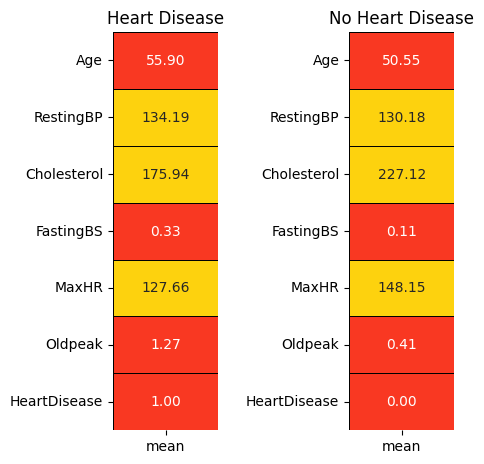

In [37]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)
#Mean values of all the features for cases of heart diseases and non-heart diseases.


In [38]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [39]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


##**Data Analysis**

[]

<Figure size 1500x1000 with 0 Axes>

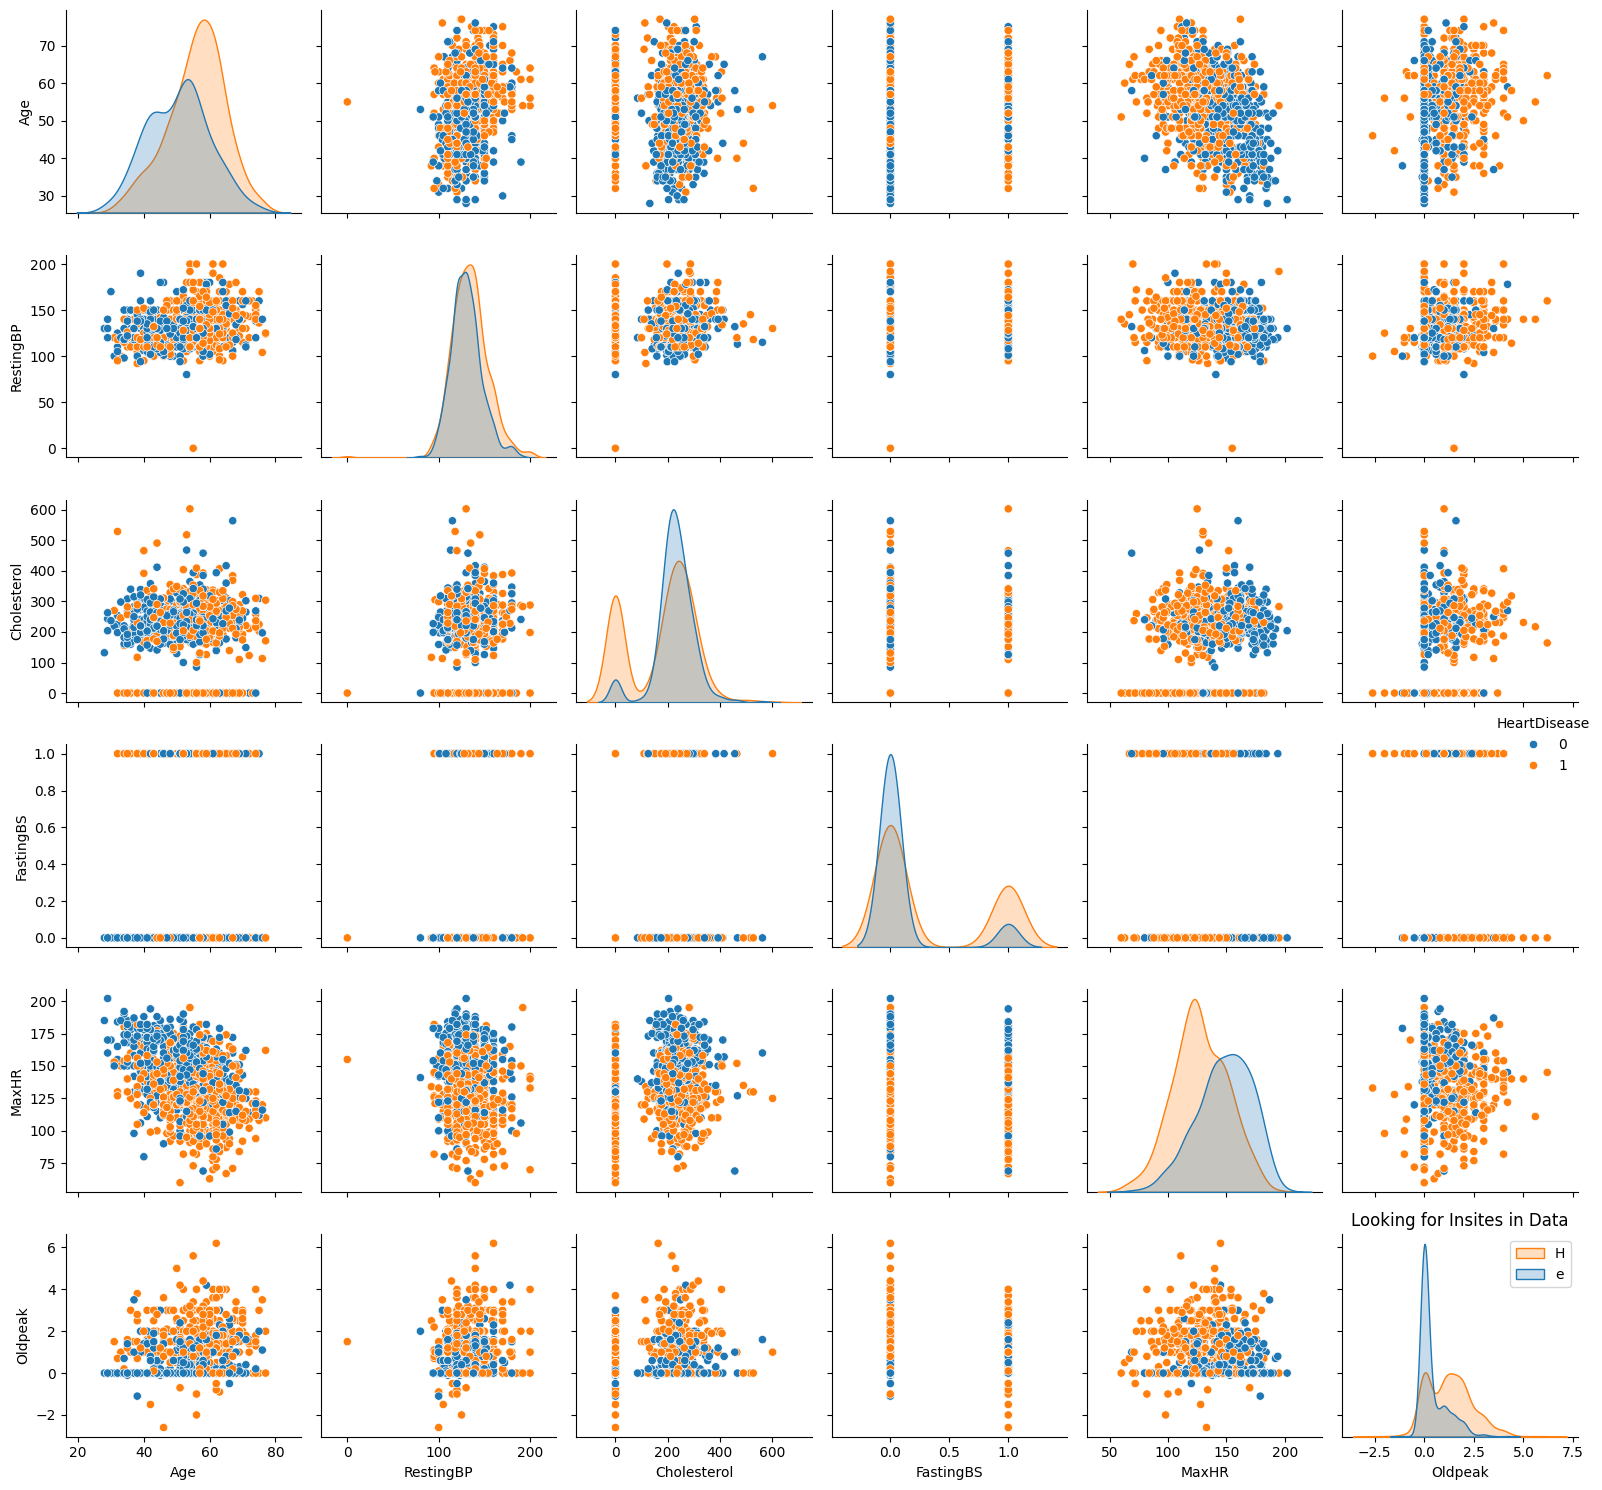

In [8]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

<Axes: >

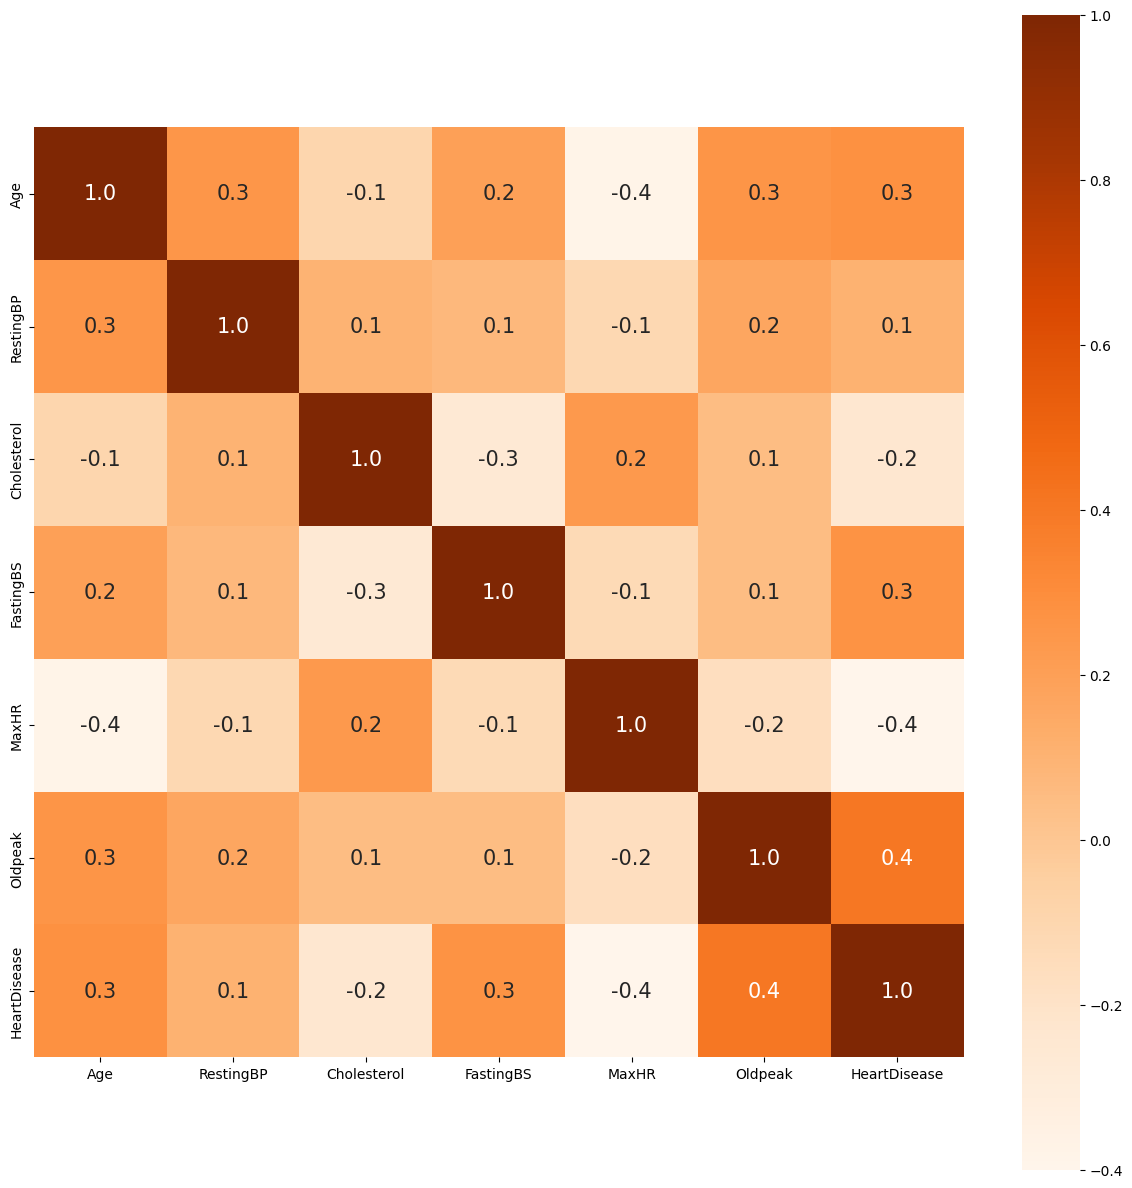

In [7]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
corr = numeric_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Oranges')

##**Splitting The Dataset Into Training Set and Test set**

In [42]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#**Training our Machine Learning Model**

##**Using Logistic Regression**

In [43]:
categorical_cols = X_train.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_logreg = []
fold_num = 1

for train_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]


    #scaling the dataset
    scaler = MinMaxScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)
    # Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_tr_scaled, y_tr)
    y_pred = model.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_pred)
    acc_logreg.append(acc)

    print(f"Fold {fold_num} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, digits=4))
    fold_num += 1


print(f"Mean Accuracy: {np.mean(acc_logreg):.4f}")


Fold 1 Accuracy: 0.8571
              precision    recall  f1-score   support

           0     0.8594    0.8209    0.8397        67
           1     0.8554    0.8875    0.8712        80

    accuracy                         0.8571       147
   macro avg     0.8574    0.8542    0.8554       147
weighted avg     0.8572    0.8571    0.8568       147

Fold 2 Accuracy: 0.8231
              precision    recall  f1-score   support

           0     0.7971    0.8209    0.8088        67
           1     0.8462    0.8250    0.8354        80

    accuracy                         0.8231       147
   macro avg     0.8216    0.8229    0.8221       147
weighted avg     0.8238    0.8231    0.8233       147

Fold 3 Accuracy: 0.8231
              precision    recall  f1-score   support

           0     0.8254    0.7761    0.8000        67
           1     0.8214    0.8625    0.8415        80

    accuracy                         0.8231       147
   macro avg     0.8234    0.8193    0.8207       147
we

##**Using SVM(Support Vector Machines)**

In [44]:
categorical_cols = X_train.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_svm_rbf = []
fold_num = 1

for train_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    scaler = MinMaxScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)


    model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    model.fit(X_tr_scaled, y_tr)
    y_pred = model.predict(X_val_scaled)

    # accuracy and report
    acc = accuracy_score(y_val, y_pred)
    acc_svm_rbf.append(acc)
    print(f"Fold {fold_num} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, digits=4))
    fold_num += 1

print(f"Mean Cross-Validation Accuracy (SVM RBF): {np.mean(acc_svm_rbf):.4f}")

Fold 1 Accuracy: 0.8571
              precision    recall  f1-score   support

           0     0.8966    0.7761    0.8320        67
           1     0.8315    0.9250    0.8757        80

    accuracy                         0.8571       147
   macro avg     0.8640    0.8506    0.8539       147
weighted avg     0.8611    0.8571    0.8558       147

Fold 2 Accuracy: 0.8503
              precision    recall  f1-score   support

           0     0.8814    0.7761    0.8254        67
           1     0.8295    0.9125    0.8690        80

    accuracy                         0.8503       147
   macro avg     0.8555    0.8443    0.8472       147
weighted avg     0.8532    0.8503    0.8492       147

Fold 3 Accuracy: 0.8367
              precision    recall  f1-score   support

           0     0.8772    0.7463    0.8065        67
           1     0.8111    0.9125    0.8588        80

    accuracy                         0.8367       147
   macro avg     0.8442    0.8294    0.8326       147
we

##**Using XGboost**

In [45]:
# Make safe copies to avoid SettingWithCopyWarning
Xtr_all = X_train.copy()
Xte_all = X_test.copy()

# Encode categorical columns: fit on train, transform on test
categorical_cols = Xtr_all.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    Xtr_all[col] = le.fit_transform(Xtr_all[col].astype(str))
    Xte_all[col] = le.transform(Xte_all[col].astype(str))

# Cross-validation on training data
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_xgb = []
fold_num = 1

for train_idx, val_idx in kf.split(Xtr_all, y_train):
    X_tr, X_val = Xtr_all.iloc[train_idx], Xtr_all.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit scaler only on training fold (to avoid data leakage)
    scaler = MinMaxScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)

    # Initialize XGBoost classifier
    model = xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'  # avoids warning in recent versions
        # if you get an error about 'use_label_encoder', just remove it
    )

    # Train the model
    model.fit(X_tr_scaled, y_tr)

    # Predict on validation fold
    y_pred = model.predict(X_val_scaled)

    # Evaluate
    acc = accuracy_score(y_val, y_pred)
    acc_xgb.append(acc)

    print(f"Fold {fold_num} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, digits=4))
    fold_num += 1

print(f"Mean Cross-Validation Accuracy (XGBoost): {np.mean(acc_xgb):.4f}")

Fold 1 Accuracy: 0.8776
              precision    recall  f1-score   support

           0     0.8657    0.8657    0.8657        67
           1     0.8875    0.8875    0.8875        80

    accuracy                         0.8776       147
   macro avg     0.8766    0.8766    0.8766       147
weighted avg     0.8776    0.8776    0.8776       147

Fold 2 Accuracy: 0.8707
              precision    recall  f1-score   support

           0     0.8871    0.8209    0.8527        67
           1     0.8588    0.9125    0.8848        80

    accuracy                         0.8707       147
   macro avg     0.8730    0.8667    0.8688       147
weighted avg     0.8717    0.8707    0.8702       147

Fold 3 Accuracy: 0.8707
              precision    recall  f1-score   support

           0     0.8750    0.8358    0.8550        67
           1     0.8675    0.9000    0.8834        80

    accuracy                         0.8707       147
   macro avg     0.8712    0.8679    0.8692       147
we

##**Using K-nearest Neighbors**

In [51]:
#using gridsearchcv to find the hyperparameter k

# Feature scaling (essential for KNN)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for k
param_grid = {'n_neighbors': list(range(1, 21))}  # Testing k from 1 to 20

# Use Stratified 5-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV to find the best k
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy'
)

# Fit GridSearch
grid_search.fit(X_train_scaled, y_train)

# Best k and corresponding accuracy
print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", grid_search.best_score_)

# Detailed classification report using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_train_scaled)
print(classification_report(y_train, y_pred, digits=4))



Best k: 13
Best cross-validated accuracy: 0.8474606280868512
              precision    recall  f1-score   support

           0     0.8930    0.8018    0.8449       333
           1     0.8483    0.9202    0.8828       401

    accuracy                         0.8665       734
   macro avg     0.8706    0.8610    0.8639       734
weighted avg     0.8686    0.8665    0.8656       734



In [52]:
categorical_cols = X_train.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_knn = []
fold_num = 1

for train_idx, val_idx in kf.split(Xtr_all, y_train):
    X_tr, X_val = Xtr_all.iloc[train_idx], Xtr_all.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit scaler only on training fold (to avoid data leakage)
    scaler = MinMaxScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    X_val_scaled = scaler.transform(X_val)
    # Initialize KNN classifier
    model = KNeighborsClassifier(n_neighbors=13)

    # Train the model
    model.fit(X_tr_scaled, y_tr)

    # Make predictions
    y_pred = model.predict(X_val_scaled)

    # Compute accuracy and classification report
    acc = accuracy_score(y_val, y_pred)
    acc_knn.append(acc)

    print(f"Fold {fold_num} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, digits=4))
    fold_num += 1

# Compute mean accuracy across all folds
print(f"Mean Accuracy: {np.mean(acc_knn):.4f}")


Fold 1 Accuracy: 0.8435
              precision    recall  f1-score   support

           0     0.8929    0.7463    0.8130        67
           1     0.8132    0.9250    0.8655        80

    accuracy                         0.8435       147
   macro avg     0.8530    0.8356    0.8393       147
weighted avg     0.8495    0.8435    0.8416       147

Fold 2 Accuracy: 0.8367
              precision    recall  f1-score   support

           0     0.8413    0.7910    0.8154        67
           1     0.8333    0.8750    0.8537        80

    accuracy                         0.8367       147
   macro avg     0.8373    0.8330    0.8345       147
weighted avg     0.8370    0.8367    0.8362       147

Fold 3 Accuracy: 0.8095
              precision    recall  f1-score   support

           0     0.8197    0.7463    0.7812        67
           1     0.8023    0.8625    0.8313        80

    accuracy                         0.8095       147
   macro avg     0.8110    0.8044    0.8063       147
we

##**Using Random Forest Classifier**

In [53]:
# 5-Fold Stratified Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_rf = []
fold_num = 1

for train_idx, val_idx in kf.split(Xtr_all, y_train):
    X_tr, X_val = Xtr_all.iloc[train_idx], Xtr_all.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    # Initialize Random Forest classifier
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42
    )

    # Train the model
    model.fit(X_tr, y_tr)

    # Make predictions
    y_pred = model.predict(X_val)

    # Compute accuracy and classification report
    acc = accuracy_score(y_val, y_pred)
    acc_rf.append(acc)

    print(f"Fold {fold_num} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, digits=4))
    fold_num += 1

# Compute mean accuracy across all folds
print(f"Mean Accuracy: {np.mean(acc_rf):.4f}")


Fold 1 Accuracy: 0.8844
              precision    recall  f1-score   support

           0     0.8788    0.8657    0.8722        67
           1     0.8889    0.9000    0.8944        80

    accuracy                         0.8844       147
   macro avg     0.8838    0.8828    0.8833       147
weighted avg     0.8843    0.8844    0.8843       147

Fold 2 Accuracy: 0.8435
              precision    recall  f1-score   support

           0     0.8548    0.7910    0.8217        67
           1     0.8353    0.8875    0.8606        80

    accuracy                         0.8435       147
   macro avg     0.8451    0.8393    0.8412       147
weighted avg     0.8442    0.8435    0.8429       147

Fold 3 Accuracy: 0.8435
              precision    recall  f1-score   support

           0     0.8793    0.7612    0.8160        67
           1     0.8202    0.9125    0.8639        80

    accuracy                         0.8435       147
   macro avg     0.8498    0.8368    0.8400       147
we


# 📊 Model Evaluation & Comparison

This section trains multiple **classification models** on the Heart Failure dataset and compares them using **Accuracy, Precision, Recall, F1-score**, and **ROC-AUC**.  
It also selects the **best model** based on F1-score and explains **why** it is a good fit for this dataset.


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,RandomForest,0.869565,0.895238,0.878505,0.886792,0.939252
1,SVM (RBF),0.864130,0.886792,0.878505,0.882629,0.948173
2,KNN,0.864130,0.910000,0.850467,0.879227,0.941558
3,LogisticRegression,0.853261,0.900000,0.841121,0.869565,0.927418


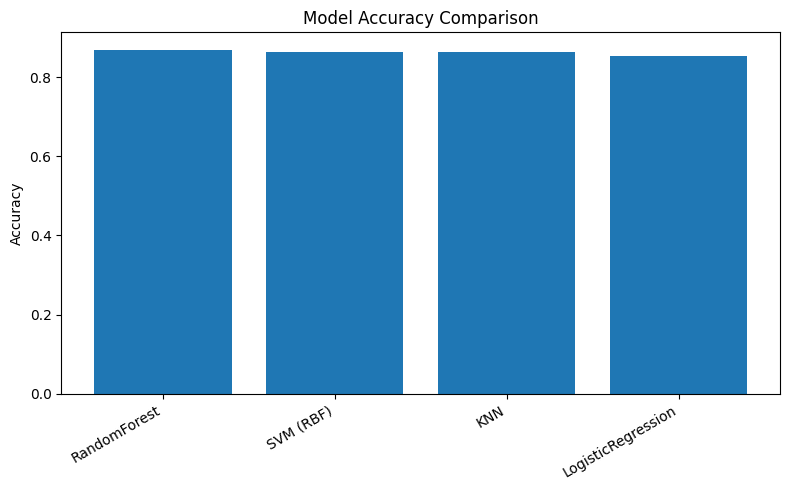


 Best model by F1-score: RandomForest
Model        RandomForest
Accuracy         0.869565
Precision        0.895238
Recall           0.878505
F1               0.886792
ROC_AUC          0.939252
Name: 0, dtype: object

Classification Report (Best Model):

              precision    recall  f1-score   support

           0     0.8354    0.8571    0.8462        77
           1     0.8952    0.8785    0.8868       107

    accuracy                         0.8696       184
   macro avg     0.8653    0.8678    0.8665       184
weighted avg     0.8702    0.8696    0.8698       184

Confusion Matrix:
[[66 11]
 [13 94]]


In [54]:
from sklearn.pipeline import Pipeline

# Separate X, y
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
# identify categorical and numeric columns by dtype + known names in Kaggle dataset
known_cats = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
categorical_cols = [c for c in X.columns if (str(X[c].dtype) in ("object","category")) or (c in known_cats)]
numeric_cols = [c for c in X.columns if c not in categorical_cols]

# Preprocessors
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Pipelines per model
# For linear/SVM/KNN we benefit from scaling numeric features.
preprocess_scaled = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_cols),
        ("num",  StandardScaler(), numeric_cols)
    ],
    remainder="drop",
)

# For tree-based/GaussianNB: trees don't need scaling; NB can work with scaled or unscaled; we still OHE categoricals.
preprocess_no_scale = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_cols),
        ("num", "passthrough", numeric_cols)
    ],
    remainder="drop",
)
models = {
    "LogisticRegression": Pipeline([
        ("prep", preprocess_scaled),
        ("clf", LogisticRegression(max_iter=2000, n_jobs=None, class_weight=None))
    ]),
    "KNN": Pipeline([
        ("prep", preprocess_scaled),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    "SVM (RBF)": Pipeline([
        ("prep", preprocess_scaled),
        ("clf", SVC(kernel="rbf", probability=True))
    ]),
    "RandomForest": Pipeline([
        ("prep", preprocess_no_scale),
        ("clf", RandomForestClassifier(n_estimators=300, random_state=42))
    ])
}
results = []

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
     # Probabilities for ROC-AUC if available
    if hasattr(pipe.named_steps[list(pipe.named_steps.keys())[-1]], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    else:
        # fallback using decision function or set to NaN
        if hasattr(pipe.named_steps[list(pipe.named_steps.keys())[-1]], "decision_function"):
            from sklearn.metrics import roc_auc_score
            scores = pipe.decision_function(X_test)
            # Convert to probability-like via ranking; or compute ROC on scores directly
            roc = roc_auc_score(y_test, scores)
        else:
            roc = np.nan

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC_AUC": roc
    })

results_df = pd.DataFrame(results).sort_values(by=["F1","Accuracy"], ascending=False).reset_index(drop=True)
display(results_df)

# Save results
results_df.to_csv("model_comparison_results.csv", index=False)

# Plot Accuracy Bar Chart
plt.figure(figsize=(8,5))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# Select best by F1
best_row = results_df.iloc[0]
best_model_name = str(best_row["Model"])
print(f"\n Best model by F1-score: {best_model_name}")
print(best_row)

# Show classification report and confusion matrix for the best model
best_pipe = models[best_model_name]
y_pred_best = best_pipe.predict(X_test)
print("\nClassification Report (Best Model):\n")
print(classification_report(y_test, y_pred_best, digits=4))

cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(cm)


# **Model Comparison & Results**
In this section, we will compare all trained models based on multiple metrics (Accuracy, Precision, Recall, F1 Score, and ROC-AUC). This helps us select the best-performing algorithm for the Heart Failure Prediction dataset.


Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
3,RandomForest,0.869565,0.895238,0.878505,0.886792,0.939252
2,SVM (RBF),0.864130,0.886792,0.878505,0.882629,0.948173
1,KNN,0.864130,0.910000,0.850467,0.879227,0.941558
0,LogisticRegression,0.853261,0.900000,0.841121,0.869565,0.927418


<Figure size 1000x600 with 0 Axes>

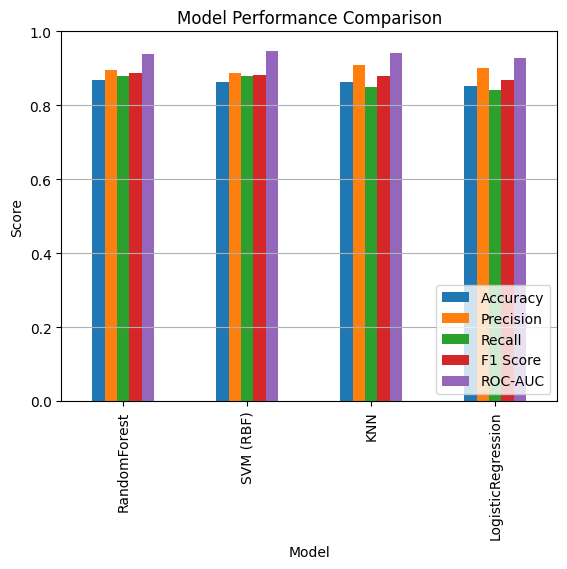

In [55]:
# Model Comparison Section

# Dictionary to store model results
results = []

# Loop through all trained models and evaluate them
for name, model in models.items():  # models should be a dictionary like {"Logistic Regression": log_model, ...}
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Save results
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC-AUC": auc
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Sort models by F1 Score (or any metric you want)
results_df = results_df.sort_values(by="F1 Score", ascending=False)

# Show results
print("Model Comparison Results:")
display(results_df)

# Save results to CSV (optional, for GitHub repository)
results_df.to_csv("model_comparison_results.csv", index=False)

# Plot a bar chart for better visualization
plt.figure(figsize=(10,6))
results_df.set_index("Model")[["Accuracy","Precision","Recall","F1 Score","ROC-AUC"]].plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.grid(axis="y")
plt.show()


#**Conclusion**

# 🩺 Heart Failure Prediction – Conclusion  

In this project, we explored different **machine learning algorithms** for predicting heart failure risk, including:  

- 🔹 Logistic Regression  
- 🔹 K-Nearest Neighbors (KNN)  
- 🔹 Support Vector Machine (SVM)  
- 🔹 XGboost
- 🔹 Random Forest  

---

## 📊 Model Comparison  
Each model was evaluated using **Accuracy, Precision, Recall, F1-score, and ROC-AUC**.  
Among all, the **🌲 Random Forest Classifier** achieved the **best overall performance**, striking a strong balance between **recall** (catching most positive cases) and **precision** (avoiding false alarms).  

---

## ✅ Why Random Forest Works Best
- Handles both **linear & non-linear** patterns  
- Reduces **overfitting** compared to a single decision tree  
- Provides **feature importance** → helpful for medical interpretation  

---

## 🏁 Final Takeaway  
While **Random Forest** was the top-performing model, **Logistic Regression** also showed good results and remains valuable when **simplicity & interpretability** are essential (e.g., in clinical decision-making).  

⚡️ **Bottom line:** For this dataset, ensemble models like Random Forest are most effective, but real-world healthcare applications must balance **accuracy, interpretability, and computational cost**.  
